**Objective**
- Perform customer segmentation using clustering techniques to group customers based on their
purchasing behavior, allowing businesses to target each segment effectively.


In [4]:
# Install necessary library (run this if required)
# !pip install pandas numpy matplotlib seaborn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Step-1: Load the datset**

In [6]:
# Load the datset
ds_url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv" # Replace with actual dataset url
df=pd.read_csv(ds_url)

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
# Display the first few row of the dataset
print("First 5 rows of the dataset")
df.head()

First 5 rows of the dataset


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
# Check for missing values
print("\nMissing values in Dataset:")
df.isnull().sum()


Missing values in Dataset:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Step-2: Data Preprocessing**

In [101]:
# Select relevant columns (e.g., Age, Annual Income, Spending Score)
# For illustration, we assume columns ['sepal_length', 'sepal_width', 'petal_length'] are used for clustering

features=df[['sepal_length', 'sepal_width', 'petal_length']]
features

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [102]:
# Standardize the data
# for df
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

# Display the first few rows of standardized data
print("\nFirst 5 rows of scaled features:")
scaled_features[:5]


First 5 rows of scaled features:


array([[-0.90068117,  1.01900435, -1.34022653],
       [-1.14301691, -0.13197948, -1.34022653],
       [-1.38535265,  0.32841405, -1.39706395],
       [-1.50652052,  0.09821729, -1.2833891 ],
       [-1.02184904,  1.24920112, -1.34022653]])

**Step-3: Clustering**

In [103]:
# By using Elbow method to determine the optimal number of clusters
inertia=[]
k_range=range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

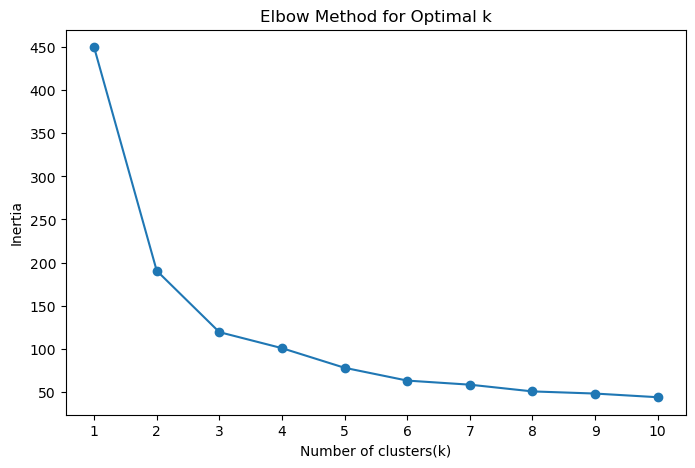

In [104]:
# Plot the Elbow method Graph
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [105]:
# Perform K-Means clustering with the optimal k (from the elbow method assume k=3 here)
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels=kmeans.fit_predict(scaled_features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [106]:
# Add cluster labels to the original dataset
df['Cluster']=cluster_labels

In [107]:
df['Cluster']

0      2
1      2
2      2
3      2
4      2
      ..
145    0
146    1
147    0
148    0
149    1
Name: Cluster, Length: 150, dtype: int32

In [94]:
# Display the first few rows with cluster labels
print("\nFirst 5 rows with cluster labels:")
df.head()


First 5 rows with cluster labels:


,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


**Step-4: Clustering**

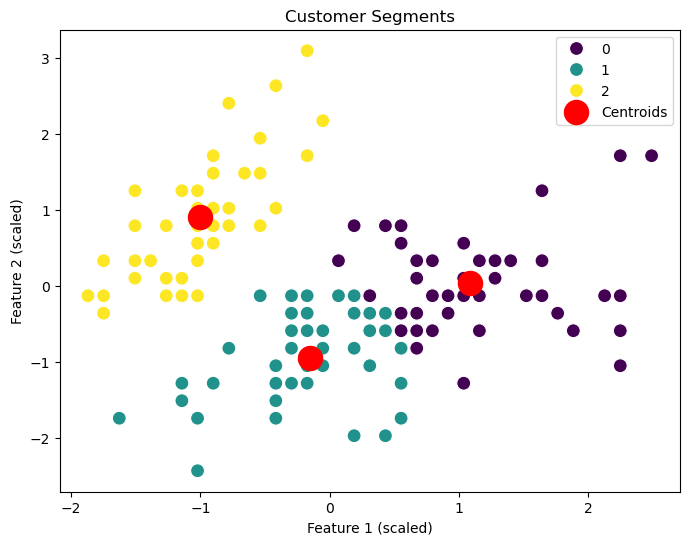

In [109]:
# Visualize clusters (usinf the first two features for plotting)

plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()